# Missing Value with Random simple imputer 

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [230]:
df =pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [231]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [232]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [233]:
df.isnull().mean() *100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [234]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [235]:
X =df.drop(columns=['Survived'])
y=df['Survived']

In [236]:
X_train, X_test, y_train, y_test =train_test_split(X, y ,test_size=0.2, random_state=2)

In [237]:
X_train.head(1)

,Age,Fare
30,40.0,27.7208


In [238]:
y_train

30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64

In [239]:
X_train['Age_imputed'] =X_train['Age']
X_test['Age_imputed'] =X_test['Age']

In [240]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [241]:
# X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
# X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [242]:
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum(), random_state=42).values
)

X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum(), random_state=42).values
)


In [243]:
X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values

array([], dtype=float64)

In [244]:
X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum(), random_state=42).values


array([], dtype=float64)

In [245]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,18.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


C:\Users\Engineer\AppData\Local\Temp\ipykernel_9736\2447919383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Orginal', hist=False)
C:\Users\Engineer\AppData\Local\Temp\ipykernel_9736\2447919383.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_t

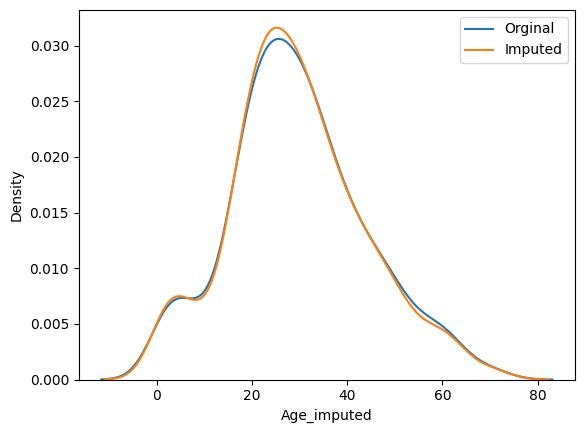

In [246]:
sns.distplot(X_train['Age'], label='Orginal', hist=False)
sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False)

plt.legend()
plt.show()

In [247]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  200.02896637747122


In [248]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.259863
Age,71.512440,204.349513,204.349513
Age_imputed,53.259863,204.349513,200.028966


<Axes: >

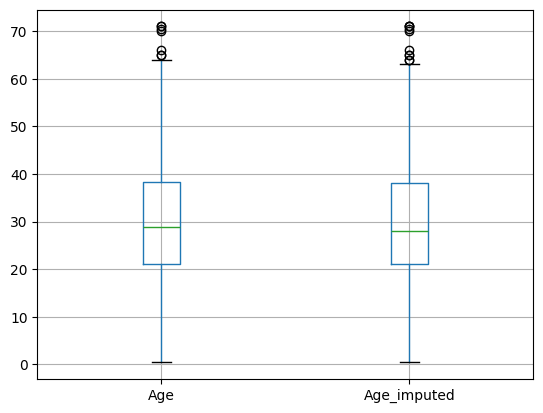

In [249]:
X_train[['Age', 'Age_imputed']].boxplot()

In [250]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

# catogrical 


In [251]:
data = pd.read_csv('house-train.csv', usecols=['GarageQual','FireplaceQu', 'SalePrice'])


In [252]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [253]:
data.isnull().mean() *100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [254]:
X =data
y=data['SalePrice']

In [255]:
X_trian, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2)

In [256]:
# X_train['GarageQual_imputed'] = X_train['GarageQual']
# X_test['GarageQual_imputed'] = X_test['GarageQual']

# X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
# X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [257]:
X_train['GarageQual_imputed'] = X_train.get('GarageQual', 'Missing')
X_test['GarageQual_imputed'] = X_test.get('GarageQual', 'Missing')

X_train['FireplaceQu_imputed'] = X_train.get('FireplaceQu', 'Missing')
X_test['FireplaceQu_imputed'] = X_test.get('FireplaceQu', 'Missing')


In [258]:
# X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
# X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

# X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
# X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [259]:
X_train.sample(5)


,Age,Fare,Age_imputed,GarageQual_imputed,FireplaceQu_imputed
562,28.0,13.5000,28.0,Missing,Missing
439,31.0,10.5000,31.0,Missing,Missing
843,34.5,6.4375,34.5,Missing,Missing
283,19.0,8.0500,19.0,Missing,Missing
713,29.0,9.4833,29.0,Missing,Missing
